In [2]:
# import cv2
import os
print(os.sys.path)
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
# from evaluate.lane import LaneEval
# %matplotlib inline
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.spatial import distance
# from google.colab.patches import cv2_imshow

['c:\\Users\\Mohtashim Butt\\Documents\\Fall-2022\\CV\\Project', 'c:\\Users\\Mohtashim Butt\\anaconda3\\python39.zip', 'c:\\Users\\Mohtashim Butt\\anaconda3\\DLLs', 'c:\\Users\\Mohtashim Butt\\anaconda3\\lib', 'c:\\Users\\Mohtashim Butt\\anaconda3', '', 'c:\\Users\\Mohtashim Butt\\anaconda3\\lib\\site-packages', 'c:\\Users\\Mohtashim Butt\\anaconda3\\lib\\site-packages\\win32', 'c:\\Users\\Mohtashim Butt\\anaconda3\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Mohtashim Butt\\anaconda3\\lib\\site-packages\\Pythonwin', 'c:\\Users\\Mohtashim Butt\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Mohtashim Butt\\.ipython']


image_0 Raw Dispay: 


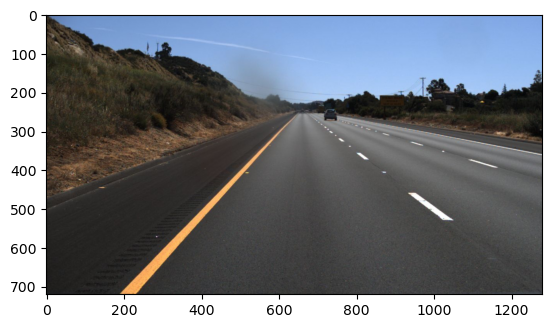

image_1 Raw Dispay: 


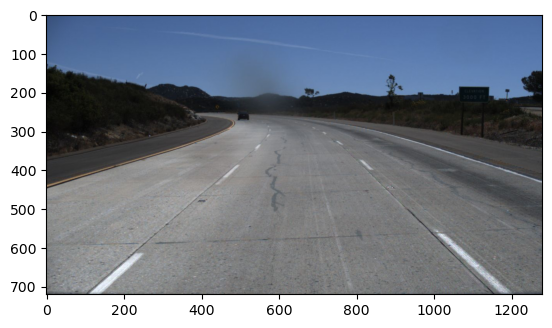

image_2 Raw Dispay: 


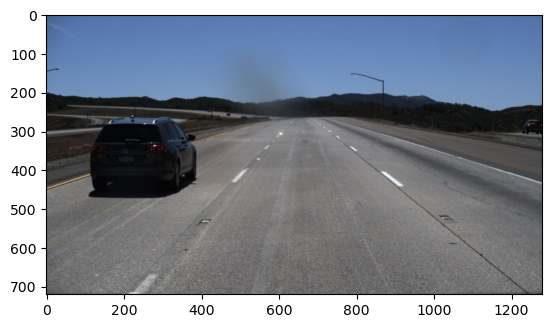

Image_0 Annotated: 


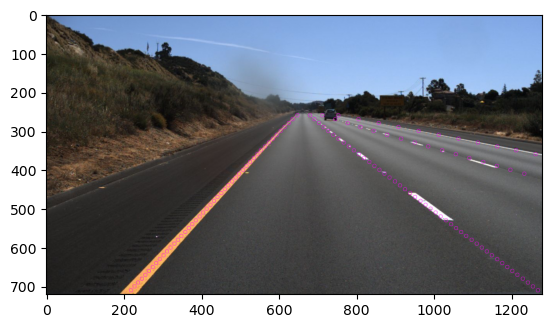

Image_1 Annotated: 


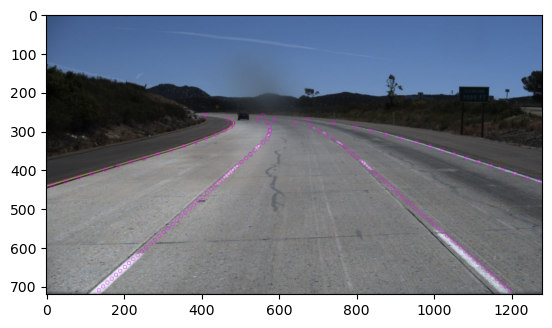

Image_2 Annotated: 


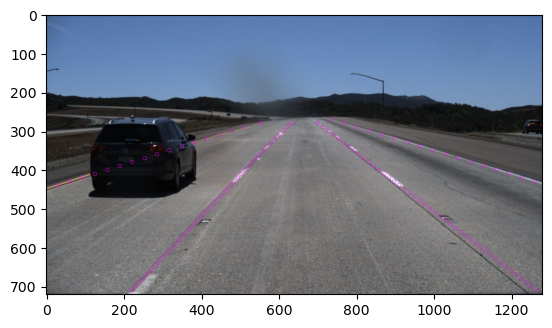

In [3]:
my_path = "test_label.json"
json_gt = [json.loads(line) for line in open(my_path)]
# print(json_gt)


gt = list() #will take data of 3 images
gt_lanes = list() #will take x values of lane data of 3 images
y_samples = list()  #will take y values of lanes
raw_file = list() #will take raw images' paths (with no annotation)
img = list() #will take raw images (with no annotation)
for i in range(0,3):  #I am displaying onli 3 images, if you want to c more, change the loop range (don't forget to change in below loop too)
  gt.append(json_gt[i])
  gt_lanes.append(gt[i]['lanes'])
  y_samples.append(gt[i]['h_samples'])
  raw_file.append(gt[i]['raw_file'])
  img.append(plt.imread("Project_Dataset/"+raw_file[i]))
  print(f"image_{i} Raw Dispay: ")  #displaying raw image
  plt.imshow(img[i])
  plt.show()

gt_lanes_vis = list() #list of images with lane spots
img_vis = list()  #list of images with red cirles on lane
for k in range(0,3):
  gt_lanes_vis.append([[(x, y) for (x, y) in zip(lane, y_samples[k]) if x >= 0] for lane in gt_lanes[k]])
  img_vis.append(img[k])
  for lane in gt_lanes_vis[k]:
    for pt in lane:
      cv2.circle(img_vis[k],pt,radius=5,color = (255,0,255))
  print(f"Image_{k} Annotated: ") #diplaying annotated image
  plt.imshow(img_vis[k])
  plt.show()


In [ ]:
# python tools/test_lanenet.py --weights_path /PATH/TO/YOUR/CKPT_FILE_PATH